<a href="https://colab.research.google.com/github/msalihk1git/Customer_Lead_score_prediction/blob/main/Copy_of_Lead_Score_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix,classification_report
import re
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [7]:
#Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Luminar_Projects/Project/Lead_Score_Prediction/Data_Science_Internship_Dump.csv")

In [8]:
 #First five rows of dataset
 df.head()

,Unnamed: 0,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


In [9]:
#last five rows of dataset
df.tail()

,Unnamed: 0,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
46603,46603,2306878a9ad9b57686cd623dd285aaa9b25afdf627f651...,LOST,Low availability,£60 - £120 Per week,Complete Education Year Stay 50 - 52 weeks,01/09/22,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,7d1550b844ff586a6023216c06263105eed0a849a2a1f6...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,13d4b96b6ee361b737e22404aeecca45f322ba7d4c2c42...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,1aaa4a4a9092e4c0eabf958ed9aea59c50d8ea3f08f691...
46604,46604,327ec29056cc47c24bf922f7dc0f78261dad5c726d7353...,LOST,Semester stay,£60 - £120 Per week,Summer/Short Stay 8 - 12 weeks,29/09/22,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9f2ba6981e36ea0fca6c16f42e6413d788d2a7499b8b7f...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,998c18dc0e513ab0035c7b858e3780bbbead88695a15de...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,1f90dbad4873cb9673ff3c7ec69fbac4289181453c6cea...
46605,46605,1134c0a7d44fdae1afd7f1f64e2789496784095ca0a050...,LOST,Low availability,£241 - £300 Per week,Full Year Course Stay 40 - 44 weeks,20/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,7d1550b844ff586a6023216c06263105eed0a849a2a1f6...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,d9e0f455b68a6573544ffac32292541a510fe2daffe2bb...
46606,46606,8b8b029f1142f5cbc825aa6cbee01406c915c6b055db79...,LOST,Low availability,1108,294,30/08/22,d684761c17c11590f6e2525b48141cb2c0c6f2be5df4e2...,e9c722cbefc2f055ae60b4e2cbe73a2d99537eab0c37f3...,b936ee09e20b3b2234907cde349cda1c1a5327c4a486bf...,7f3fa48ca885678134842fa7456f3ece53a97f843b6101...,abb8e2badd5b6265c3237170cc599257a4f566706715d2...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1f90dbad4873cb9673ff3c7ec69fbac4289181453c6cea...
46607,46607,1ea65ea38f2f574b3875ba895e4ff76b284b7725041612...,LOST,Low availability,£181 - £240 Per Week,Full Year Course Stay 40 - 44 weeks,01/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,1496126b7015defbc3b1d129a46096a5c135075aff2add...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,618738f7143c9b43a98a6b42d743a6595069a9b4dcf42d...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,7520a8abba2b44d7f37c0ddbe5f7f3d87540b2b7a670e9...


In [10]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46608 entries, 0 to 46607
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      46608 non-null  int64 
 1   Agent_id        46608 non-null  object
 2   status          46608 non-null  object
 3   lost_reason     43244 non-null  object
 4   budget          42908 non-null  object
 5   lease           44267 non-null  object
 6   movein          32970 non-null  object
 7   source          46608 non-null  object
 8   source_city     46608 non-null  object
 9   source_country  46608 non-null  object
 10  utm_source      46608 non-null  object
 11  utm_medium      46608 non-null  object
 12  des_city        46608 non-null  object
 13  des_country     46608 non-null  object
 14  room_type       23061 non-null  object
 15  lead_id         46608 non-null  object
dtypes: int64(1), object(15)
memory usage: 5.7+ MB


In [11]:
#shape of the dataset
df.shape

(46608, 16)

In [12]:
# Removing leads with status other than WON or LOST
df = df[df['status'].isin(['WON','LOST'])]
df.status.count()

46317

In [13]:
#Checking for null values
df.isna().sum()

Unnamed: 0            0
Agent_id              0
status                0
lost_reason        3073
budget             3694
lease              2336
movein            13610
source                0
source_city           0
source_country        0
utm_source            0
utm_medium            0
des_city              0
des_country           0
room_type         23491
lead_id               0
dtype: int64

In [14]:
#Replacing '9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0' to  NAN value:--
df = df.replace('9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0', np.nan)

In [15]:
#after replacing to NAN values
df.isna().sum()

Unnamed: 0            0
Agent_id              0
status                0
lost_reason        3073
budget             3694
lease              2336
movein            13610
source             5951
source_city        8831
source_country     8622
utm_source           61
utm_medium         3184
des_city           2529
des_country        2529
room_type         23491
lead_id               0
dtype: int64

In [16]:
#No of elements in status columns
df['status'].value_counts()

LOST    43244
WON      3073
Name: status, dtype: int64

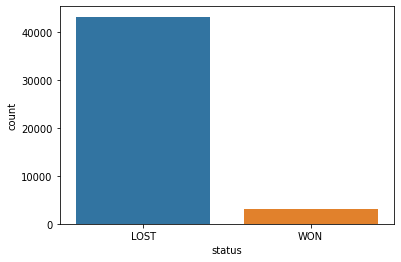

In [17]:
#plotting the status column elements
sns.countplot(x="status",data=df)
plt.show()

In [18]:
#  considering only data which has <10% none values
cols = []

for i in df.columns:
  if df[i].isnull().sum() < len(df)/10:
    cols.append(i)

In [19]:
cols

['Unnamed: 0',
 'Agent_id',
 'status',
 'lost_reason',
 'budget',
 'lease',
 'utm_source',
 'utm_medium',
 'des_city',
 'des_country',
 'lead_id']

In [20]:
#create dataframe of the columns in cols
df =  df.loc[:,cols]
df.head()

,Unnamed: 0,Agent_id,status,lost_reason,budget,lease,utm_source,utm_medium,des_city,des_country,lead_id
0,0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,NaN,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


In [21]:
# replacing the nan values in the columns with the most frequent values of the particular column :-
df2 = df.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [22]:
df2.head()

,Unnamed: 0,Agent_id,status,lost_reason,budget,lease,utm_source,utm_medium,des_city,des_country,lead_id
0,0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,£60 - £120 Per week,Full Year Course Stay 40 - 44 weeks,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,£60 - £120 Per week,Full Year Course Stay 40 - 44 weeks,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,£60 - £120 Per week,Full Year Course Stay 40 - 44 weeks,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


In [23]:
#Dropping column with less importance
df2 = df2.drop(['Unnamed: 0','Agent_id','lead_id'],axis = 1)
# df2.drop(labels=df2.columns[-1],axis=1,inplace=True)
# df2.drop(labels=df2.columns[0],axis=1,inplace=True)

In [24]:
df2

,status,lost_reason,budget,lease,utm_source,utm_medium,des_city,des_country
0,LOST,Not responding,£60 - £120 Per week,Full Year Course Stay 40 - 44 weeks,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...
1,LOST,Low budget,£60 - £120 Per week,Full Year Course Stay 40 - 44 weeks,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...
2,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...
3,LOST,Low budget,0-0,0,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...
4,LOST,Junk lead,£60 - £120 Per week,Full Year Course Stay 40 - 44 weeks,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...
...,...,...,...,...,...,...,...,...
46603,LOST,Low availability,£60 - £120 Per week,Complete Education Year Stay 50 - 52 weeks,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,13d4b96b6ee361b737e22404aeecca45f322ba7d4c2c42...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...
46604,LOST,Semester stay,£60 - £120 Per week,Summer/Short Stay 8 - 12 weeks,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,998c18dc0e513ab0035c7b858e3780bbbead88695a15de...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...
46605,LOST,Low availability,£241 - £300 Per week,Full Year Course Stay 40 - 44 weeks,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...
46606,LOST,Low availability,1108,294,7f3fa48ca885678134842fa7456f3ece53a97f843b6101...,abb8e2badd5b6265c3237170cc599257a4f566706715d2...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...


In [25]:
#Again checking for null values
df2.isna().sum()

status         0
lost_reason    0
budget         0
lease          0
utm_source     0
utm_medium     0
des_city       0
des_country    0
dtype: int64

In [26]:
# finding the number of unique values of the column :-
for col in df2.columns:

  print(col ," = ",len(df2[col].unique()))

status  =  2
lost_reason  =  30
budget  =  1851
lease  =  311
utm_source  =  34
utm_medium  =  63
des_city  =  219
des_country  =  14


In [27]:
# Unique catagorical values of the lease
df2['lease'].unique()

array(['Full Year Course Stay 40 - 44 weeks', '0', 'semester-stay', '51',
       'Semester Stay 20 - 24 weeks',
       'Complete Education Year Stay 50 - 52 weeks', 'full-course-stay',
       'full-year-stay', 'Other', '51 weeks', '44', '18',
       'full year stay', '51weeks', 'Summer/Short Stay 8 - 12 weeks',
       '51 weeks \\', 'other', 'short-stay', '52 weeks', '44 weeks', '12',
       '1 year', '96', '43', '20', '294', '20 - 24 weeks', '1 year .',
       '48', '40', 'N51', '6', 'Academic year', '8', '51Weeks',
       '50 weeks', '84', '15 weeks', 'full course', '45', '39', '1',
       '5 weeks', '50', '12-24', '25', '45 weeks', '19', '44-51',
       '6 weeks', 'FULL YEAR', '24-36', '32', '44/week', '42', '3 month',
       '44-51 weeks', '3 months', '24', '6 months', '2 years', '10', '52',
       '2 weeks', '46', 'sem stay', '13', 'lease', 'short stay', '4',
       '52weeks', '69', '16', '50 - 52 weeks', '44 - 51 weeks',
       '4-8 weeks', '4 weeks', '3', 'Full year stay', '11',

In [28]:
#The are similar unique values,but mentioned different due to spelling mistakes.Correct the spelling mistakes  :-
import re

def correct_spelling(text):
    # replace "sem" or "semester" with "semester"
    text = re.sub(r'\b(sem(?:ester)?)\b', 'semester', text, flags=re.IGNORECASE)
    # replace "stay" or "stya" with "stay"
    text = re.sub(r'\bstay(?:a)?\b', 'stay', text, flags=re.IGNORECASE)
    # replace "full" with "full"
    text = re.sub(r'\b(full)\b', 'full', text, flags=re.IGNORECASE)
    # replace "year" or "yyear" with "year"
    text = re.sub(r'\b(y(?:ea)?r)\b', 'year', text, flags=re.IGNORECASE)
    # replace "short" or "shotr" with "short"
    text = re.sub(r'\b(sh(?:or)?t)\b', 'short', text, flags=re.IGNORECASE)
    # replace "week" or "weeeks" with "week"
    text = re.sub(r'\b(week(?:s)?)\b', 'week', text, flags=re.IGNORECASE)
    text = re.sub(r'\b(\d+\s*weeks?)\b', 'week', text, flags=re.IGNORECASE)
    # replace "month" or "motnhs" with "month"
    text = re.sub(r'\b(month(?:s)?)\b', 'month', text, flags=re.IGNORECASE)
    # replace "long" or "tearm" with "long term"
    text = re.sub(r'\blong\b|\btearm\b', 'long term', text, flags=re.IGNORECASE)
    # replace "academic" with "academic"
    text = re.sub(r'\b(academic)\b', 'academic', text, flags=re.IGNORECASE)
    return text

In [29]:
# correcting the spellings of the lease values :-
df2['lease'] = df2['lease'].apply(correct_spelling)

In [30]:
df2['lease'].unique()

array(['full year Course stay 40 - week', '0', 'semester-stay', '51',
       'semester stay 20 - week',
       'Complete Education year stay 50 - week', 'full-course-stay',
       'full-year-stay', 'Other', 'week', '44', '18', 'full year stay',
       'Summer/short stay 8 - week', 'week \\', 'other', 'short-stay',
       '12', '1 year', '96', '43', '20', '294', '20 - week', '1 year .',
       '48', '40', 'N51', '6', 'academic year', '8', '84', 'full course',
       '45', '39', '1', '50', '12-24', '25', '19', '44-51', 'full year',
       '24-36', '32', '44/week', '42', '3 month', '44-week', '24',
       '6 month', '2 years', '10', '52', '46', 'semester stay', '13',
       'lease', 'short stay', '4', '69', '16', '50 - week', '44 - week',
       '4-week', '3', '11', '10-week', '40-44', 'week]', '26',
       '40 - week', '51\\', '36 - 44', '140', '41', '56', '1 month',
       '10 month', '<=8', '21', '2', '24-week', '350', '06 month', '47',
       '38', '54', '37', '30', '15', '22', '17', 

In [31]:
def clean_lease(lease_value):

  if re.search(pattern="^[0-9 ]*-[0-9 ]*(weeks|WEEKS|Weeks|Week|week)$",string=lease_value):

    return lease_value[0:re.search("(weeks|WEEKS|Weeks|Week|week)$",string=lease_value).start()]

  elif re.search(pattern="^[0-9 ]*-[0-9 ]*(weeks|WEEKS|Weeks|Week|week)*$",string=lease_value):

    return lease_value[re.search("[0-9 ]*",string=lease_value).start():re.search("^[0-9 ]*",string=lease_value).end()]

  elif re.search(pattern="^[0-9 ]*(weeks|WEEKS|Weeks|Week|week)*$",string=lease_value):

    return lease_value[re.search("[0-9 ]*",string=lease_value).start():re.search("(weeks|WEEKS|Weeks|Week|week)*",string=lease_value).start()]

  else:

    return lease_value

In [32]:
df2.lease.nunique()

223

In [33]:
# Applying regular expression function :-
df2['lease'] = df2['lease'].apply(clean_lease)

In [34]:
#Reduce unique values of budget
def calculate_average(data):
    if re.match(r'£\d+ - £\d+ Per week', data):
        # extract the lower and upper bounds using string manipulation
        lower_bound = float(data.split('£')[1].split(' - ')[0])
        upper_bound = float(data.split('£')[2].split(' ')[0])
        # calculate the average
        average_price = str((lower_bound + upper_bound) / 2)
        return average_price
    elif re.match(r'£\d+ - £\d+ Per Week', data):
        # extract the lower and upper bounds using string manipulation
        lower_bound = float(data.split('£')[1].split(' - ')[0])
        upper_bound = float(data.split('£')[2].split(' ')[0])
        # calculate the average
        average_price = str((lower_bound + upper_bound) / 2)
        return average_price
    else:
        return data

In [35]:
# apply the function to the column and replace the original strings with the averages
df2['budget'] = df2['budget'].apply(calculate_average)

In [36]:
df2['status'] = df2['status'].replace({'WON':1,'LOST':0})

In [37]:
df2['status'].unique()

array([0, 1])

In [38]:
#convert categorical to numeric values
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [39]:
df2['lost_reason'] = labelencoder.fit_transform(df2['lost_reason'])
df2['budget'] = labelencoder.fit_transform(df2['budget'])
df2['lease'] = labelencoder.fit_transform(df2['lease'])
df2['utm_source'] = labelencoder.fit_transform(df2['utm_source'])
df2['utm_medium'] = labelencoder.fit_transform(df2['utm_medium'])	
df2['des_city'] = labelencoder.fit_transform(df2['des_city'])
df2['des_country'] = labelencoder.fit_transform(df2['des_country'])
df2['status'] = labelencoder.fit_transform(df2['status'])

In [40]:
df2

,status,lost_reason,budget,lease,utm_source,utm_medium,des_city,des_country
0,0,21,1664,106,5,10,205,8
1,0,16,1664,106,5,10,74,8
2,0,21,973,106,25,3,18,8
3,0,16,10,0,25,3,26,8
4,0,8,1664,106,5,10,205,8
...,...,...,...,...,...,...,...,...
46603,0,15,1664,91,25,3,22,8
46604,0,24,1664,97,25,3,135,8
46605,0,15,1241,106,25,3,205,8
46606,0,15,818,0,19,49,205,8


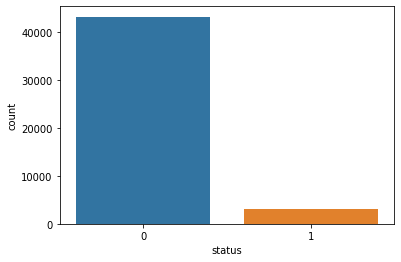

In [41]:
#plotting the target variable
sns.countplot(x="status",data=df2)
plt.show()

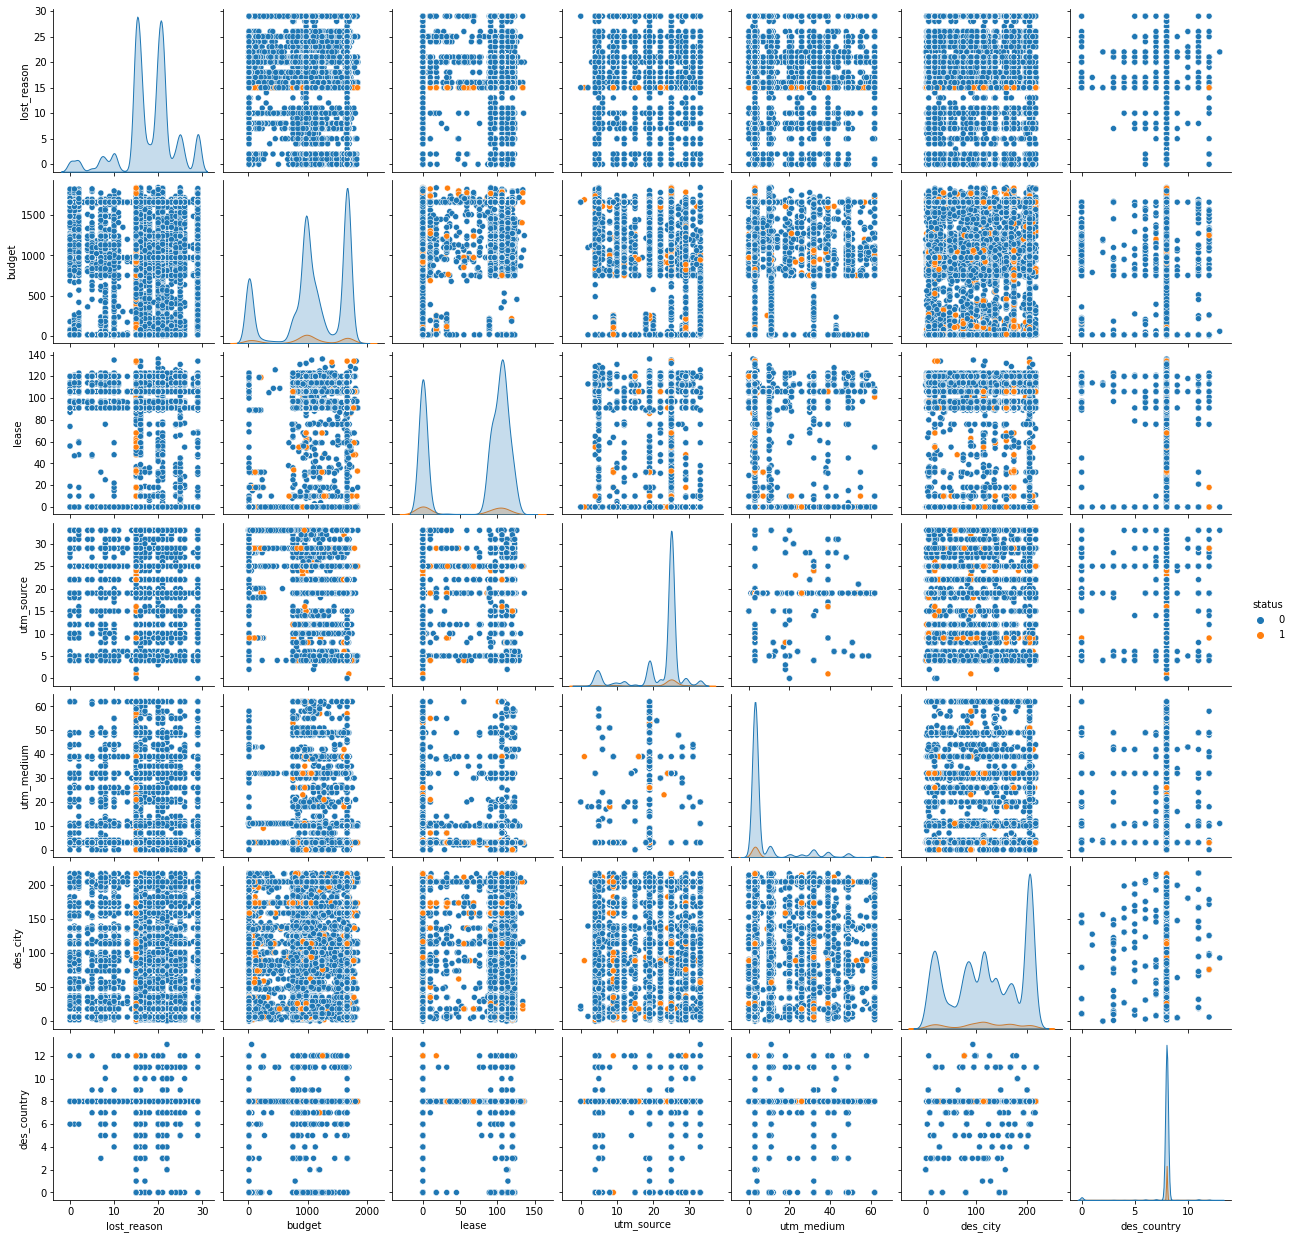

In [42]:
#Pairplot using sns
sns.pairplot(df2,hue="status")

In [43]:
df2.corr()['status']

status         1.000000
lost_reason   -0.128074
budget        -0.034877
lease         -0.082400
utm_source    -0.004878
utm_medium    -0.052548
des_city      -0.028154
des_country    0.032179
Name: status, dtype: float64

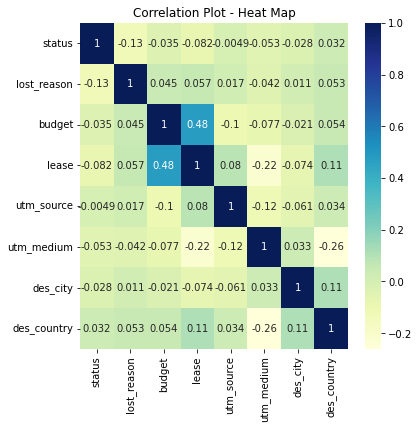

In [44]:
#Correlation using heat map in input Dataset

plt.figure(figsize=(6,6))
sns.heatmap(df2.corr(),annot=True,cmap="YlGnBu")
plt.title("Correlation Plot - Heat Map")
plt.show()

In [45]:
# Seperate X and y
X= df2.drop(['status'],axis=1)
y = df2['status']


In [46]:
X

,lost_reason,budget,lease,utm_source,utm_medium,des_city,des_country
0,21,1664,106,5,10,205,8
1,16,1664,106,5,10,74,8
2,21,973,106,25,3,18,8
3,16,10,0,25,3,26,8
4,8,1664,106,5,10,205,8
...,...,...,...,...,...,...,...
46603,15,1664,91,25,3,22,8
46604,24,1664,97,25,3,135,8
46605,15,1241,106,25,3,205,8
46606,15,818,0,19,49,205,8


In [47]:
y.value_counts()

0    43244
1     3073
Name: status, dtype: int64

In [48]:
df2


,status,lost_reason,budget,lease,utm_source,utm_medium,des_city,des_country
0,0,21,1664,106,5,10,205,8
1,0,16,1664,106,5,10,74,8
2,0,21,973,106,25,3,18,8
3,0,16,10,0,25,3,26,8
4,0,8,1664,106,5,10,205,8
...,...,...,...,...,...,...,...,...
46603,0,15,1664,91,25,3,22,8
46604,0,24,1664,97,25,3,135,8
46605,0,15,1241,106,25,3,205,8
46606,0,15,818,0,19,49,205,8


In [49]:
# feature scaling
scale = StandardScaler()
X = scale.fit_transform(X)

import joblib 
joblib.dump(scale,'/content/drive/MyDrive/Luminar_Projects/Project/Lead_Score_Prediction/scale.pkl')

['/content/drive/MyDrive/Luminar_Projects/Project/Lead_Score_Prediction/scale.pkl']

In [50]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [51]:
# #using smote  to balance the output 
# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state = 42)
# X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [52]:
y_train.value_counts()

0    30251
1     2170
Name: status, dtype: int64

In [53]:
log =LogisticRegression()
dtc =DecisionTreeClassifier()
rf = RandomForestClassifier()
adb = AdaBoostClassifier()
grad = GradientBoostingClassifier()
svc = SVC()
knn = KNeighborsClassifier()
nbc = GaussianNB()

voting=VotingClassifier(estimators=[("Logistic_Regression",log),("Decision_Tree_Classifier",dtc),("Random_Forest_Classifier",rf),("AdaBoost_Classifier",adb),("Gragient_Boosting_Classifier",grad),("SVC",svc),("KNeighborsClassifier",knn),("GaussianNB",nbc)],voting="hard")

voting.fit(X_train,y_train)

VotingClassifier(estimators=[('Logistic_Regression', LogisticRegression()),
                             ('Decision_Tree_Classifier',
                              DecisionTreeClassifier()),
                             ('Random_Forest_Classifier',
                              RandomForestClassifier()),
                             ('AdaBoost_Classifier', AdaBoostClassifier()),
                             ('Gragient_Boosting_Classifier',
                              GradientBoostingClassifier()),
                             ('SVC', SVC()),
                             ('KNeighborsClassifier', KNeighborsClassifier()),
                             ('GaussianNB', GaussianNB())])

In [54]:
for  clf in (log,dtc,rf,adb,grad,svc,knn,nbc,voting):
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  print(clf.__class__.__name__,clf.score(X_train,y_train))
  print(clf.__class__.__name__,accuracy_score(y_test,y_pred))
  
  print("===========================")

LogisticRegression 0.9330372289565405
LogisticRegression 0.9349453080023028
DecisionTreeClassifier 0.9931217420807501
DecisionTreeClassifier 0.9779073114565342
RandomForestClassifier 0.9931217420807501
RandomForestClassifier 0.9763241220495107
AdaBoostClassifier 0.9692174824959131
AdaBoostClassifier 0.9694876223373633
GradientBoostingClassifier 0.975725609944172
GradientBoostingClassifier 0.97402130109384
SVC 0.9358132074889732
SVC 0.9380397236614854
KNeighborsClassifier 0.9732272292649826
KNeighborsClassifier 0.9626511226252159
GaussianNB 0.833441288054039
GaussianNB 0.8260650546919976
VotingClassifier 0.9789950957712593
VotingClassifier 0.9725100748416811


In [55]:
from sklearn.model_selection import GridSearchCV
lr_clf = LogisticRegression()
df_clf= DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
adboost_clf = AdaBoostClassifier()
grad_clf = GradientBoostingClassifier()
svc_clf = SVC()
xgb_clf = XGBClassifier()
knn_clf = KNeighborsClassifier()

clf_list=[lr_clf,df_clf,rf_clf,adboost_clf,grad_clf,svc_clf,xgb_clf,knn_clf]

grid_params_lr= [{'penalty':['l1','l2'],'solver':['saga']}]

grid_params_df =[{'criterion':["gini","entropy"], 'splitter':['best','random'],'max_depth':[3,4,5],'min_samples_split':[2,3,4],'max_features':["auto","sqrt","log2"]}]

grid_params_rf=[{'n_estimators': [4, 6, 9], 'max_features': ['log2', 'sqrt','auto'], 'criterion': ['entropy', 'gini'],'max_depth': [2, 3, 5, 10]}]

grid_params_adboost=[{'n_estimators':[10,50,250,1000],'learning_rate':[0.01,0.1],}]

grid_params_grad=[{'loss':['deviance', 'exponential'],'learning_rate':[1,7,9],'criterion':['friedman_mse','mse']}]

grid_params_svc=[{'kernel':['linear','poly','rbf'],'degree':[3,4,5]}]

grid_params_xgb=[{'booster':['gbtree', 'gblinear'],'nthread':[10,15,25]}]

grid_params_knn=[{'n_neighbors':[5,7,9,11],'algorithm':['ball_tree','kd_tree','brute'],'leaf_size':[30,50,100]}]



clf_params=[grid_params_lr,grid_params_df,grid_params_rf,grid_params_adboost,grid_params_grad,grid_params_svc,grid_params_xgb,grid_params_knn]

In [56]:
for clf,clf_param in zip(clf_list,clf_params):
  print(f"The Classifier is {clf} and its hyper params are {clf_param}")

  grid_clf = GridSearchCV(estimator=clf,param_grid=clf_param,scoring="accuracy",cv=10)
  grid_clf.fit(X_train,y_train)
  print(f"The Train accuracy for the {clf} is {grid_clf.score(X_train,y_train)}")
  print(f"The Test accuracy for the {clf} is {grid_clf.score(X_test,y_test)}")
  print(f"The best param for {clf} is {grid_clf.best_params_}")
 
  print("====================\n")

The Classifier is LogisticRegression() and its hyper params are [{'penalty': ['l1', 'l2'], 'solver': ['saga']}]
The Train accuracy for the LogisticRegression() is 0.9330372289565405
The Test accuracy for the LogisticRegression() is 0.9349453080023028
The best param for LogisticRegression() is {'penalty': 'l1', 'solver': 'saga'}

The Classifier is DecisionTreeClassifier() and its hyper params are [{'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [3, 4, 5], 'min_samples_split': [2, 3, 4], 'max_features': ['auto', 'sqrt', 'log2']}]
The Train accuracy for the DecisionTreeClassifier() is 0.9330680731624564
The Test accuracy for the DecisionTreeClassifier() is 0.9350172711571675
The best param for DecisionTreeClassifier() is {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 3, 'splitter': 'best'}

The Classifier is RandomForestClassifier() and its hyper params are [{'n_estimators': [4, 6, 9], 'max_features': ['log2', 'sqrt', 

In [57]:
# making the best model 

grad_clf = GradientBoostingClassifier(criterion = 'friedman_mse',learning_rate = 1, loss='deviance')
grad_clf.fit(X_train,y_train)


GradientBoostingClassifier(learning_rate=1, loss='deviance')

In [58]:
# Predicting on the testing set
y_pred = rf.predict(X_test)

In [59]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [60]:
#classification report of  dataset :-
cm = confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12993
           1       0.83      0.80      0.81       903

    accuracy                           0.98     13896
   macro avg       0.91      0.89      0.90     13896
weighted avg       0.98      0.98      0.98     13896



Text(0.5, 6.0, 'Predicted Values')

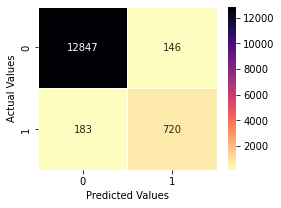

In [61]:
plt.figure(figsize=(4,3))
sns.heatmap(cm,annot=True, fmt="d", linewidths=.5,cmap="magma_r")
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

In [62]:
#Pickle file
import joblib 
joblib.dump(grad_clf,'/content/drive/MyDrive/Luminar_Projects/Project/Lead_Score_Prediction/model.pkl')

['/content/drive/MyDrive/Luminar_Projects/Project/Lead_Score_Prediction/model.pkl']

In [63]:
# accuracy score :-
acc = accuracy_score(y_test,y_pred)
print("Accuracy score is:",acc)

Accuracy score is: 0.9763241220495107


In [64]:
#precision score :-
precision = precision_score(y_test,y_pred)

print("Precision score is:",precision)

Precision score is: 0.8314087759815243


In [70]:
#Recall score :-
recall = recall_score(y_test,y_pred)

print("Recall score is:",recall)

Recall score is: 0.7973421926910299


In [73]:
#F1 score :-
f1_score = f1_score(y_test,y_pred)

print("F1 score is:",f1_score)

F1 score is: 0.8140192198982475


In [65]:
prediction= grad_clf.predict_proba(X)

In [66]:
print(prediction)

[[9.99999981e-01 1.87371066e-08]
 [9.99992486e-01 7.51375963e-06]
 [9.99955054e-01 4.49458317e-05]
 ...
 [8.66572359e-01 1.33427641e-01]
 [9.82012184e-01 1.79878159e-02]
 [4.18615079e-01 5.81384921e-01]]


In [67]:
predictions = prediction[:,0]
predictions

array([0.99999998, 0.99999249, 0.99995505, ..., 0.86657236, 0.98201218,
       0.41861508])

In [68]:
df2['leads_score'] = predictions*100

In [69]:
df2

,status,lost_reason,budget,lease,utm_source,utm_medium,des_city,des_country,leads_score
0,0,21,1664,106,5,10,205,8,99.999998
1,0,16,1664,106,5,10,74,8,99.999249
2,0,21,973,106,25,3,18,8,99.995505
3,0,16,10,0,25,3,26,8,99.999122
4,0,8,1664,106,5,10,205,8,99.999223
...,...,...,...,...,...,...,...,...,...
46603,0,15,1664,91,25,3,22,8,99.352720
46604,0,24,1664,97,25,3,135,8,99.999999
46605,0,15,1241,106,25,3,205,8,86.657236
46606,0,15,818,0,19,49,205,8,98.201218
